Método de Euler para resolver ecuaciones diferenciales de primer orden

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def euler (f, t0, tn, x0, n) :
    t = np.linspace (t0, tn, n+1)
    x = np.zeros (n+1)
    x [0] = x0
    h = (tn-t0)/n
    for i in range (1, n+1) :
        x[i] = x[i-1] + h * f(t[i-1], x[i-1]) 
    return ((t, x))

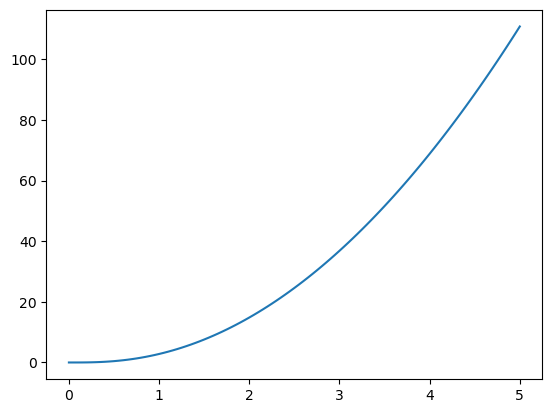

In [9]:
# Función
def f(t, x) :
    y = (50*t**2-10*x)/3
    return (y)
(t, x) = euler (f, 0, 5, 0, 100)
plt.plot (t,x)

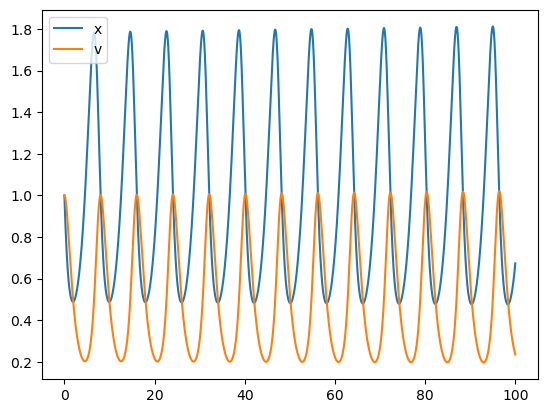

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def f1 (t, x, v):
    return (2/3*x-4/3*x*v)
def f2 (t, x, v):
    return (x*v-v)
def euler2 (f1, f2, t0, tn, x0, v0, n) :
    t = np.linspace (t0, tn, n+1)
    x = np.zeros (n+1)
    v = np.zeros (n+1)
    x [0] = x0
    v [0] = v0
    h = (tn-t0)/n
    for i in range (1, n+1) :
        x[i] = x[i-1] + h * f1(t[i-1], x[i-1], v[i-1]) 
        v[i] = v[i-1] + h * f2(t[i-1], x[i-1], v[i-1]) 
    return ((t, x, v))
(t, x, v) = euler2 (f1, f2, 0, 100, 1, 1, 100000)
plt.plot (t, x, label ="x")
plt.plot (t, v, label = "v")
plt.legend ()